


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados
1 - Ler os arquivos;
2 - Buscar as informações gerais de cada arquivo;
3 - Ler as 5 primeiras linhas;
4 - Caso apresente valores ausentes na leitura das informações, identificar as colunas e a quantidade de valores ausentes em cada uma delas;
5 - Verificar se o tipo de cada coluna corresponde com a descrição da mesma.


In [60]:
import pandas as pd  # Importe as bibliotecas

In [61]:
df_instacart_orders = pd.read_csv('instacart_orders.csv', sep=';') # DataFrame instacart_orders.csv
df_products = pd.read_csv('products.csv', sep=';') #DataFrame exclusive products.csv
df_order = pd.read_csv('order_products.csv', sep=';') #DataFrame order_products.csv
df_aisles_id = pd.read_csv('aisles.csv', sep=';') #DataFrame aisles.csv
df_departments = pd.read_csv('departments.csv', sep=';') #DataFrame departments.csv

In [62]:
print(df_instacart_orders.info()) # imprima as informações sobre o DataFrame
print()
print(df_instacart_orders.head()) # mostre as 5 primeiras linhas
print()
print(df_instacart_orders.isna().sum()) # conte quantos valores ausentes existe em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                

In [63]:
print(df_products.info()) # imprima as informações sobre o DataFrame
print()
print(df_products.head()) # mostre as 5 primeiras linhas
print()
print(df_products.isna().sum()) # conte quantos valores ausentes existe em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             

In [64]:
print(df_order.info(show_counts=True))# imprima as informações sobre o DataFrame
print()
print(df_order.head()) # mostre as 5 primeiras linhas
print()
print(df_order.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [65]:
print(df_aisles_id.info()) # imprima as informações sobre o DataFrame
print()
print(df_aisles_id.head()) # mostre as 5 primeiras linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [66]:
print(df_departments.info()) # imprima as informações sobre o DataFrame
print()
print(df_departments.head()) # mostre as 5 primeiras linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Para ter uma visão geral dos dados foi utilizado o método **info()** que nos permite identificar a quantidade de colunas e o tipo de cado uma delas além dos valores ausentes. Como os dados estavam separados por vírgula, foi utilizado o método **sep = ';'** logo após a leitura do arquivo. Assim os dados ficam organizados facilitanto a leitura. 

Podemos ver que três arquivos apresentaram valores ausentes. Sendo assim chamamos o método **isna().sum()** para podermos identificar a quantidade de valores ausentes existe em cada coluna. Com isso, notou-se que: 

**Arquivo df_products**

A única coluca que possui valores ausentes é a product_name com um total de 1258 NaN.

**Arquivo df_instacart_orders**

A única coluca que possui valores ausentes é a days_since_prior_order com um total de 28819 Nan.

**Arquivo df_order**

A única coluca que possui valores ausentes é a add_to_cart_order com um total de 836 Nan.
 _________________
 
Também foi utilizado o método **head()** para ter um melhor entendimento. 

**Dúvida**

'order_hour_of_day': é a hora do dia em que o pedido foi feito **Nas primeiras informações que obtivemos o horário do pedido sempre é um número redondo e o tipo é int64. Não foi contabilizado os minutos?**

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [67]:
print(df_instacart_orders['order_id'].duplicated().sum()) # Verificar se há pedidos duplicados
print()
duplicatas = df_instacart_orders[df_instacart_orders.duplicated(keep=False)] #Lista de valores duplicados
print(duplicatas.sort_values('order_id')) #ordena os valores duplicados de acordo com a coluna order_id

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
242618   1021560    53767             3          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
314427   1286742   183220            48        

#Há linhas duplicadas? Se sim, o que elas têm em comum?

Há 15 linhas duplicadas. Todas as linhas duplicadas possuem as mesmas informações de order_id, user_id, order_number, order_dow, order_hour_of_day e days_since_prior_order. 

In [68]:
# Com base nas suas conclusões,
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

def filtered_order(df_instacart_orders, order_dow, order_hour_of_day): 
    return df_instacart_orders[(df_instacart_orders['order_dow'] == order_dow) & (df_instacart_orders['order_hour_of_day'] == order_hour_of_day)]
    
   
filtered_df = filtered_order(df_instacart_orders, 2, 3)
print(filtered_df)

#Essa função vai filtrar no df_instacart_orders todas a linhas onde o dia da semana(order_dow) é quarta-feira(3) e a hora(order_hour_of_day) é 2. 

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
947      1112741   135936             4          2                  3   
3944      644661    54330            26          2                  3   
6166     2041455   111466            73          2                  3   
17392     303616   103795             6          2                  3   
19386    1447623    76837             3          2                  3   
...          ...      ...           ...        ...                ...   
473051   1056433   135983             6          2                  3   
475986   2849776    80425             4          2                  3   
476213    884172    78304             9          2                  3   
477523   2399639    39508             4          2                  3   
478630   2318781    98607            40          2                  3   

        days_since_prior_order  
947                       28.0  
3944                       5.0  
6166                    

O que esse resultado quer dizer?

Podemos ver que existem 104 linhas com pedidos Às 2h na quarta-feira.

In [69]:
df_instacart_orders = df_instacart_orders.drop_duplicates() # Remova pedidos duplicados

In [70]:
print(df_instacart_orders['order_id'].duplicated().sum()) # Verifique as linhas duplicadas mais uma vez

0


In [71]:
duplicatas = df_instacart_orders[df_instacart_orders.duplicated(keep=False)] 
print(duplicatas.sort_values('order_id')) # Verifique novamente apenas os IDs de pedidos duplicados

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

Somamos os valores duplicados com **duplicated().sum()** e exibimos estes valores com **duplicated(subset=['order_id'], keep=False)]**
Com isso, nota-se que haviam 15 linhas totalmente identicas, o que não fazia sentido. Sendo assim 

### DataFrame `products`

In [72]:
print(df_products.duplicated().sum()) # Verifique se há linhas completamente duplicadas
print()
duplicated_products = df_products[df_products.duplicated(keep=False)] #Lista de valores duplicados
print(duplicated_products.sort_values('product_id')) 

0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [73]:
duplicated_products_id = df_products[df_products.duplicated(subset='product_id', keep=False)] #Lista de valores duplicados
print(duplicated_products_id.sort_values('product_id'))  # Verifique apenas IDs dos produtos duplicados

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [74]:
df_products_lower = df_products.copy()
df_products_lower['product_name'] = df_products_lower['product_name'].str.lower() # Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
duplicated_product_name = df_products_lower[df_products_lower.duplicated(subset='product_name', keep=False)]
print(duplicated_product_name.sort_values('product_name'))
                                

       product_id                               product_name  aisle_id  \
23339       23340  18-in-1 hemp peppermint pure-castile soap        25   
31844       31845  18-in-1 hemp peppermint pure-castile soap        25   
19941       19942            aged balsamic vinegar of modena        19   
13152       13153            aged balsamic vinegar of modena        19   
24830       24831         albacore solid white tuna in water        95   
...           ...                                        ...       ...   
49552       49553                                        NaN       100   
49574       49575                                        NaN       100   
49640       49641                                        NaN       100   
49663       49664                                        NaN       100   
49668       49669                                        NaN       100   

       department_id  
23339             11  
31844             11  
19941             13  
13152             1

In [75]:
df_products_filtered = duplicated_product_name[duplicated_product_name['product_name'].notna()] # Verifique os nomes de produtos duplicados que não estão faltando
print(df_products_filtered.sort_values('product_name'))

       product_id                               product_name  aisle_id  \
23339       23340  18-in-1 hemp peppermint pure-castile soap        25   
31844       31845  18-in-1 hemp peppermint pure-castile soap        25   
19941       19942            aged balsamic vinegar of modena        19   
13152       13153            aged balsamic vinegar of modena        19   
24830       24831         albacore solid white tuna in water        95   
...           ...                                        ...       ...   
46873       46874                         vitamin d3 5000 iu        47   
21366       21367              wild sardines in spring water        95   
40093       40094              wild sardines in spring water        95   
1826         1827           yams cut sweet potatoes in syrup        81   
38260       38261           yams cut sweet potatoes in syrup        81   

       department_id  
23339             11  
31844             11  
19941             13  
13152             1

Descreva brevemente suas conclusões e o que você fez com elas.

Na coluna 'product_id', não há valores duplicados. No entanto, na coluna 'product_name', havia nomes repetidos escritos de formas diferentes. Para corrigir esse problema, utilizamos o método **lower()**, convertendo todos os nomes para letras minúsculas.

Após essa correção, filtramos apenas os valores duplicados da coluna 'product_name' (exceto os NaNs) utilizando as funções **duplicated(subset='product_name', keep=False)** e **notna()**. Observamos que, embora ainda existam nomes iguais, os valores de 'product_id' são diferentes.

Por esse motivo, não removemos nenhuma linha, pois isso poderia comprometer análises futuras.

### DataFrame `departments`

In [76]:
print(df_departments.duplicated().sum())# Verifique se há linhas completamente duplicadas

0


In [77]:
duplicated_departments_id = df_departments[df_departments.duplicated(subset='department_id', keep=False)] # Verifique apenas se há IDs dos produtos duplicados
print(duplicated_departments_id)

Empty DataFrame
Columns: [department_id, department]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

Nota-se que não existe nenhuma linha totalmente duplicada. Na coluna 'department_id' também não possui valores duplicados. Como esse DataFrame possuiu apenas duas colunas, não é recomendável fazer nenhuma alteração, uma vez que os nomes dos departamento estão escritos de forma correta. 


### DataFrame `aisles`

In [78]:
print(df_aisles_id.duplicated().sum())# Verifique se há linhas completamente duplicadas


0


In [79]:
duplicated_df_aisles_id = df_aisles_id[df_aisles_id.duplicated(subset='aisle_id', keep=False)] # Verifique apenas se há IDs dos produtos duplicados
print(duplicated_df_aisles_id)
print()
duplicated_aisle = df_aisles_id[df_aisles_id.duplicated(subset='aisle', keep=False)]
print(duplicated_aisle)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

No DataFrame df_aisles_id também não há nenhum valor duplicado. Ao pesquisar somente a coluna 'aisle_id' também não foi encontrado nenhum valor duplicado. Não há problemas a serem corrigidos nos nomes na columa 'aisle'. 

### DataFrame `order_products`

In [80]:
print(df_order.duplicated().sum())# Verifique se há linhas completamente duplicadas

0


In [81]:
duplicated_order_id = df_order[df_order.duplicated(subset='order_id', keep=False)] # Verifique mais uma vez se há outros casos complicados de duplicados
duplicated_order_product = df_order[df_order.duplicated(subset='product_id', keep=False)]
print(duplicated_order_id.sort_values('order_id'))
print()
print(duplicated_order_product.sort_values('product_id'))

         order_id  product_id  add_to_cart_order  reordered
2502556         4       41276               13.0          1
3189411         4       25146               11.0          1
3977678         4       21351                6.0          1
311805          4       46842                1.0          0
1169276         4       27761                4.0          1
...           ...         ...                ...        ...
455750    3421071       35921                3.0          0
1505667   3421077       27966                1.0          0
719972    3421077       26940                3.0          0
4000108   3421077       27845                4.0          0
4417991   3421077       45007                2.0          0

[4523160 rows x 4 columns]

         order_id  product_id  add_to_cart_order  reordered
1196960   2193305           1               18.0          1
3730362     47539           1                4.0          1
2342716   1362502           1                3.0          1
2231591    

Descreva brevemente suas conclusões e o que você fez com elas.

Ao filtrar os duplicados no DataFrame df_order o número de duplicados é zero. No entanto fazendo a filtro apenas para colunas 'order_id' e 'product_id', podemos encontrar valores duplicados. 
Os valores duplicados de 'order_id' indica que cada valor corresponde a uma compra. Sendo assim os valores de 'product_id' será o itens inclusos nesta compra. 

Com a análise **duplicated_order_id** podemos ver quais produtos um determinado cliente adquiriu. Já em **duplicated_order_product** podemos ver quais clientes adquiriram os mesmos produtos. 

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [82]:
print(df_products.isna().sum()) # Encontre valores ausentes na coluna 'product_name'
print(df_products['product_name'].isna())


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: product_name, Length: 49694, dtype: bool


Descreva brevemente suas conclusões.

In [83]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

filtered_product_id = df_products[df_products['product_name'].isna()] #Filtra os valores ausentes na coluna product_name
filtered_aisle_id_100 = (filtered_product_id['aisle_id'] == 100).all() #filtra os valores iguais a 100

if filtered_aisle_id_100:
    print("Todos os nomes de produtos ausentes estão associados ao corredor de ID 100.")
else:
    print("Nem todos os nomes de produtos ausentes estão associados ao corredor de ID 100.")

print()
filtered_aisle = df_aisles_id[df_aisles_id['aisle_id'] == 100][['aisle', 'aisle_id']]
print(filtered_aisle)

Todos os nomes de produtos ausentes estão associados ao corredor de ID 100.

      aisle  aisle_id
99  missing       100


Descreva brevemente suas conclusões.

Como 'aisle_id' corresponde ao número de identificação exclusivo de cada categoria de corredor do supermercado e 'product_name' ao nome do produto faz sentido que o nome do produto seja ausente quando 'aisle_id' é igual a 100, pois este é o id do corredor com nome "missing".

In [84]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

filtered_department_id_21 = (filtered_product_id['department_id'] == 21).all() #filtra os valores iguais a 100

if filtered_department_id_21:
    print("Todos os nomes de produtos ausentes estão associados ao departamento de ID 21.")
else:
    print("Nem todos os nomes de produtos ausentes estão associados ao departamento de ID 21.")
print()
filtered_departments = df_departments[df_departments['department_id'] == 21][['department', 'department_id']]
print(filtered_departments)

Todos os nomes de produtos ausentes estão associados ao departamento de ID 21.

   department  department_id
20    missing             21


Descreva brevemente suas conclusões.

Todos os nomes de produtos ausetes estão associados ao departamento de ID 21 com o nome "missing", que podemos ver no DataFrame df_departments.

In [85]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

print(df_departments[df_departments['department_id']==21]['department'])
print()
print(df_aisles_id[df_aisles_id['aisle_id']==100]['aisle'])

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object


Descreva brevemente suas conclusões.

Podemos ver que tanto 'department_id' == 21 e 'aisle_id' == 100 possuem em comum o nome "missing". Os valores 20 e 99 são os índices de cada um deles. 

In [86]:
# Preencha nomes de produtos ausentes com 'Unknown'

df_products['product_name'] = df_products['product_name'].where(df_products['product_name'].notna(), 'Unknown')
print(df_products['product_name'].isna().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.
Substituimos os valores nulos NaN's por "Unknown" através do método **where()**.

A função **notna()** filtrou todos os valores não nulos, sendo assim o método **where()** não fez nada com esses valores e alterou para "Unknown" os valores restante, no caso os NaN's.

Depois verificamos se os NaN's foram alterados de forma correta com o método **isna().sum()**, que nos aprensetou o valor de zero. Ou seja, não existe mais NaN's na coluna product_name. 

### DataFrame `instacart_orders`

In [87]:
# Encontre os valores ausentes
print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [88]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

instacart_orders_nan = df_instacart_orders[df_instacart_orders.isna().any(axis=1)]
first_order = instacart_orders_nan[instacart_orders_nan['order_number'] > 1]

print(first_order)
print()
print("Os clientes que já fizeram mais de uma compra não possuem valores ausentes." )

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Os clientes que já fizeram mais de uma compra não possuem valores ausentes.


Descreva brevemente suas conclusões e o que você fez com elas.

O filto **instacart_orders_nan** vai selecionar todas a linhas que contém pelo menos um valor ausente. 

Como **days_since_prior_order** corresponde ao número de dias que se passaram desde a última compra, clientes com **order_number = 1** possuem NaN, pois antes da primeira compra não é possível computar valores de **days_since_prior_order**. 

Sendo assim, clietes com **'order_number' > 1** não possuem valores ausentes na coluna. Por isso ao imprimir **first_order** teremos colunas vazias. 

### DataFrame `order_products`

In [89]:
# Encontre os valores ausentes
print(df_order.isna().sum())
print()
print(df_order['add_to_cart_order'].isna())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: add_to_cart_order, Length: 4545007, dtype: bool


In [90]:
# Quais são os valores mínimo e máximo dessa coluna?
print('Valores máximos:')
print(df_order.max())
print()
print(df_products.loc[df_products['product_id'] == 49694])
print()
print('Valores mínimos:')
print(df_order.min())
print()
print(df_products.loc[df_products['product_id'] == 1])

Valores máximos:
order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64

       product_id             product_name  aisle_id  department_id
49693       49694  BURRITO- STEAK & CHEESE        38              1

Valores mínimos:
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

   product_id                product_name  aisle_id  department_id
0           1  Chocolate Sandwich Cookies        61             19


Descreva brevemente suas conclusões.

Esses valores nos mostra que a **compra(order_id) de número 3421079** teve o **item(product_id) de número 49694** colocado no carrinho na **posição(add_to_cart_order) 64**. OU seja, antes do **item 49694 (BURRITO- STEAK & CHEESE)**, outros 63 itens foram escolhidos. 

O valor de **reordered = 1** indica que este cliente já havia feito outras comprar antes desta. 

Já para os valores mínimos **compra(order_id) de número 4** teve o **item(product_id) de número 1 (Chocolate Sandwich Cookies)** colocado no carrinho na **posição(add_to_cart_order) 1**. Ou seja, o item Chocolate Sandwich Cookies foi o primeira a ser colocado no carrinho. E esta é a primeira vez que este cliente faz uma compra. 

In [91]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
df_order_nan = df_order[df_order['add_to_cart_order'].isna()]
filtered_order_id = df_order_nan[['order_id','add_to_cart_order']]

print(filtered_order_id)

         order_id  add_to_cart_order
737       2449164                NaN
9926      1968313                NaN
14394     2926893                NaN
16418     1717990                NaN
30114     1959075                NaN
...           ...                ...
4505662   1800005                NaN
4511400   1633337                NaN
4517562    404157                NaN
4534112   1673227                NaN
4535739   1832957                NaN

[836 rows x 2 columns]


In [92]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
filtered_order_id = df_order[df_order['add_to_cart_order'].isna()][['order_id','add_to_cart_order','product_id']]

order_groupby = filtered_order_id.groupby('order_id')['product_id'].count().reset_index()

filter_order_64 = order_groupby[order_groupby['product_id']>64]
print(filter_order_64)
print()

# Agrupe os pedidos com dados ausentes por ID de pedido
print(filtered_order_id)
print()

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
print(order_groupby.sort_values(by='product_id'))

Empty DataFrame
Columns: [order_id, product_id]
Index: []

         order_id  add_to_cart_order  product_id
737       2449164                NaN        5068
9926      1968313                NaN       43867
14394     2926893                NaN       11688
16418     1717990                NaN        4142
30114     1959075                NaN       42828
...           ...                ...         ...
4505662   1800005                NaN        7411
4511400   1633337                NaN         260
4517562    404157                NaN        9517
4534112   1673227                NaN       17835
4535739   1832957                NaN       17949

[836 rows x 3 columns]

    order_id  product_id
0       9310           1
13    747668           1
32   1598369           1
37   1677118           1
50   2170451           1
..       ...         ...
45   1959075          34
5     171934          40
49   2136777          44
67   3308010          51
1      61355          63

[70 rows x 2 columns]


Descreva brevemente suas conclusões.

Como já haviamos visto nos valores máximos, não há nenhum pedido com mais de 64 itens. O código acima fez um filtro para valores ausentes, imprimiu a coluna order_id e contou quantos itens haviam em cada uma delas. A order_id 61355 foi a comprar com maior quantidade de itens, sendo 63 itens. 

In [93]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order['add_to_cart_order'] = df_order['add_to_cart_order'].where(df_order['add_to_cart_order'].notna(), 999)
print(df_order['add_to_cart_order'].isna().sum()) #Contou os valores nulos novamente 
print()
df_order['add_to_cart_order'] = df_order['add_to_cart_order'].astype(int) #Transformou a coluna 'add_to_cart_order' em int
print(df_order.info()) #inprimiu as informações para verificar se a coluna 'add_to_cart_order' estava como int 

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB
None


Descreva brevemente suas conclusões e o que você fez com elas.

Os valores ausentes foram alterados com o método **where()**. Contamos novamente os valores ausentes para ter certeza que o comando está correto e ao mesmo tempo passamos a coluna 'add_to_cart_order' para integer com o método **astype(int)**.
Imprimimos os valores novamente e obtivemos **int64**

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Valores ausentes é um tema desafiador e que exige muito conhecimento dos dados em que estamos trabalhando. Sem o conhecimento do que representa cada coluna, podemos fazer interpretações erradas e cálculos sem sentido.

**df_products**

Os valores ausentes estavam localizados na coluna 'product_name'. Estes valores se relacionavam com o corredor 100 e o departamento 21, ambos com o nome "missing", o que faz sentido. 
Preenchemos os valores ausentes por "Unknown". 

**instacart_orders**

Os valores ausentes estavam localizados na coluna 'day_since_prior_order' que indica a quantidade de dias desde a última compra. 
Se um cliente que fez apenas uma compra, é normal aparecer um valor ausente na coluna 'day_since_prior_order', pois esse é um dado que não pode ser computado. 
Esse valores não foram alterados. No entanto poderíamos alterar os valores ausentes por zero(0). Assim o cliente que fez apenas uma compra teria zero dias desde a última compra. 

**order_products**

Os valores ausentes estavam localizados na coluna 'add_to_cart_order' indicando a ordem em que cada produto foi colocado no carrinho.
Isso pode significar que o item que tem o 'add_to_cart_order' não foi adicionado no carrinho. Também poderíamos alterar esses valores para 0 e não 999. Pois se um cliente fizer uma compra com mais de 999, poderemos ter outros problemas futuros. Como poderemos saber se 999 corresponde ao um item que não foi adicionado ou se é um item que realmente foi adicionado na ordem 999? 

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [94]:
import matplotlib.pyplot as plt

In [95]:
print(df_instacart_orders['order_hour_of_day'].head())
print()
print("Hora máxima:",df_instacart_orders['order_hour_of_day'].max())
print("Hora mínima:",df_instacart_orders['order_hour_of_day'].min())

0    13
1    12
2    19
3    20
4    12
Name: order_hour_of_day, dtype: int64

Hora máxima: 23
Hora mínima: 0


In [96]:
print(df_instacart_orders['order_dow'].head())
print()
print("Último dia da semana:",df_instacart_orders['order_dow'].max())
print("Primeiro dia da semana:",df_instacart_orders['order_dow'].min())

0    6
1    5
2    5
3    0
4    4
Name: order_dow, dtype: int64

Último dia da semana: 6
Primeiro dia da semana: 0


Escreva suas conclusões aqui

Os valores fazem sentido pois 'order_hour_of_day' indica o horário do dia em que o pedido foi feito. Sendo assim esse horário indica 0 para meia noite. 
Já 'order_dow' indica os dias da semana, sendo 0 o primeiro dia da semana (domingo). O último dia da semana é sábado = 6. 

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

    order_hour_of_day  order_id
4                   4       765
3                   3       770
2                   2       989
5                   5      1371
1                   1      1763
0                   0      3180
6                   6      4215
23                 23      5611
22                 22      8512
21                 21     11019
7                   7     13043
20                 20     14624
19                 19     19547
8                   8     25024
18                 18     25510
17                 17     31930
9                   9     35896
12                 12     38034
16                 16     38112
13                 13     39007
14                 14     39631
15                 15     39789
11                 11     40032
10                 10     40578


<Axes: title={'center': 'Quantidade de pedidos por hora'}, xlabel='Hora do dia', ylabel='Quantidade de pedidos'>

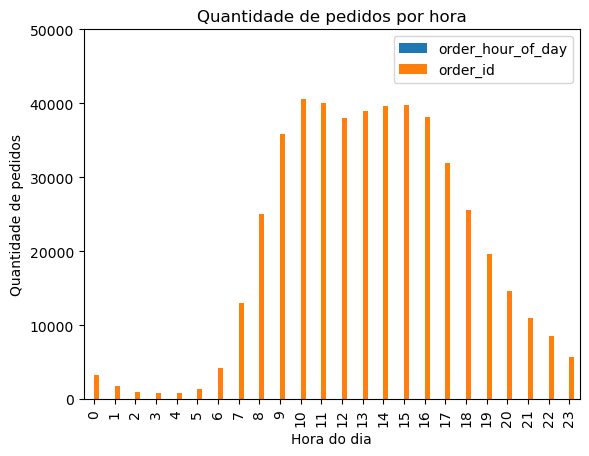

In [97]:
order_per_hour = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count().reset_index() #Contou quantas order_id haviam em cada hora
print(order_per_hour.sort_values('order_id'))

order_per_hour.plot(title= 'Quantidade de pedidos por hora',
                   xlabel= 'Hora do dia',
                   ylabel= "Quantidade de pedidos",
                   xlim= [0,23],
                   ylim= [0, 50000],
                   kind='bar')



Escreva suas conclusões aqui

Podemos ver que o horário que as pessoas menos compram são às 4h e o horário com maior vendas são às 10h.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

In [98]:
departments_food = df_departments['department']
print("O nome dos departamentos são:")
print(departments_food)
print()
print()
filtered_food = df_departments[df_departments['department'].isin(['frozen','bakery','dry goods pasta',' meat seafood','breakfast','canned goods', 'dairy eggs', 'snacks'])]
print("Os departamentos alimentícios são:")
print(filtered_food)


O nome dos departamentos são:
0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object


Os departamentos alimentícios são:
    department_id       department
0               1           frozen
2               3           bakery
8               9  dry goods pasta
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
18             19           snacks


In [99]:
df_merge = df_instacart_orders.merge(df_order[['product_id','order_id']],on='order_id') #Unimos os df's de acordo com a coluna 'order_id'
df_merge = df_merge.merge(df_products[['product_id','department_id']],on='product_id') #Unimos os df's de acordo com a coluna 'product_id'
df_merge

df_merge_food = df_merge[df_merge['department_id'].isin(filtered_food['department_id'])]
df_merge_food

df_merge_group = df_merge_food.groupby('order_dow')['product_id'].nunique().reset_index() #agrupamos a coluna 'order_dow' e contamos quantos produtod haviam na coluna 'product_id'. 
df_merge_group

,order_dow,product_id
0,0,14887
1,1,14730
2,2,14181
3,3,13986
4,4,13869
5,5,14356
6,6,14350


In [100]:
week_days = {
    0: 'Domingo',
    1: 'Segunda-feira',
    2: 'Terça-feira',
    3: 'Quarta-feira',
    4: 'Quinta-feira',
    5: 'Sexta-feira',
    6: 'Sábado'
}

In [101]:
# Substitui os números pelos dias da semana 
df_merge_group['order_dow'] = df_merge_group['order_dow'].map(week_days)

<Axes: title={'center': 'Quantidade de produdos alimentícios vendidos em cada dia da semana'}, xlabel='Dias da semana. Domingo = 0', ylabel='Produtos alimentícios vendidos'>

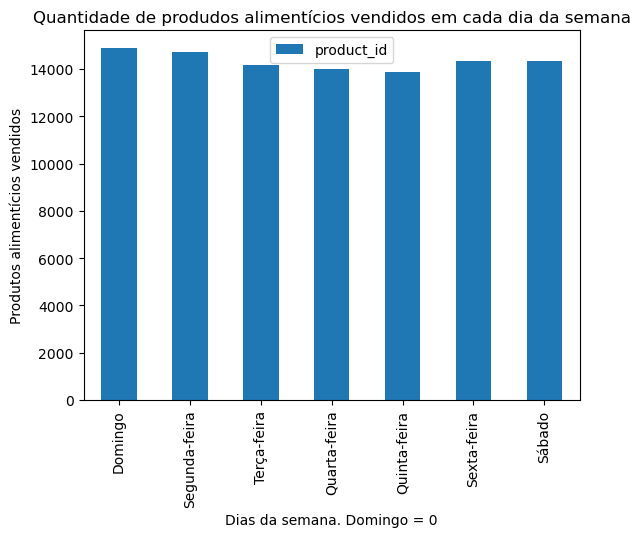

In [102]:
df_merge_group.plot(title='Quantidade de produdos alimentícios vendidos em cada dia da semana',
                   x='order_dow',
                   y='product_id',
                   kind='bar',
                   xlabel= 'Dias da semana. Domingo = 0',
                   ylabel= 'Produtos alimentícios vendidos')

Escreva suas conclusões aqui

Podemos observar que o dia da semana com maior venda de produtos alimentícios é no Domingo, com um total de 14887. 

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

(11.101813900274362,)
(30.0,)
0.0


<Axes: title={'center': 'Quantidade de compras de acordo com os dias de espera para uma próxima compra'}, xlabel='Dias de espera até a próxima compra', ylabel='Quantidade de compras'>

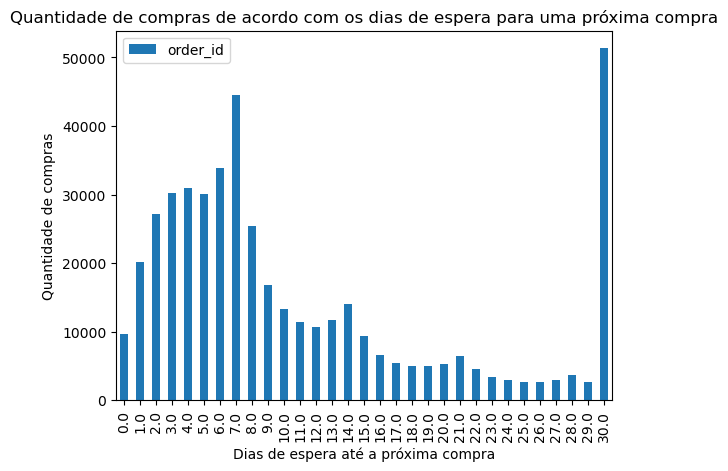

In [103]:
days_since_mean = df_instacart_orders['days_since_prior_order'].mean(),
days_since_max = df_instacart_orders['days_since_prior_order'].max(),
days_since_min = df_instacart_orders['days_since_prior_order'].min()

print(days_since_mean)
print(days_since_max)
print(days_since_min)

df_instacart_orders_group = df_instacart_orders.groupby('days_since_prior_order')['order_id'].count().reset_index()
df_instacart_orders_group

df_instacart_orders_group.plot(title='Quantidade de compras de acordo com os dias de espera para uma próxima compra',
                              xlabel='Dias de espera até a próxima compra',
                              ylabel='Quantidade de compras',
                               x='days_since_prior_order',
                               y='order_id',
                               kind='bar')
                 
     

Escreva suas conclusões aqui

Em média as pessoas esperam 11 dias até fazerem a próxima compra. 
O máximo de dias que uma pessoa esperou para comprar novamente foi 30 dias. 
Teve pessoas que não esperaram nem um dia e fizeram comprar em dias consecultivos. 

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [104]:
products_per_hour_3 = df_merge.query("order_dow == 3").groupby('order_hour_of_day')['product_id'].count()
products_per_hour_3.sort_values(ascending=True)

order_hour_of_day
2       890
3       895
4      1054
5      1393
1      2075
0      3444
6      5705
23     6962
22    11818
21    14781
7     15466
20    17046
19    22308
8     27042
18    29393
17    36354
9     38954
13    40989
12    41124
14    41172
16    43032
11    43927
10    44405
15    45710
Name: product_id, dtype: int64

<Axes: title={'center': 'Quantidade de produtos vendidos por hora na Quarta-feira'}, xlabel='Horário'>

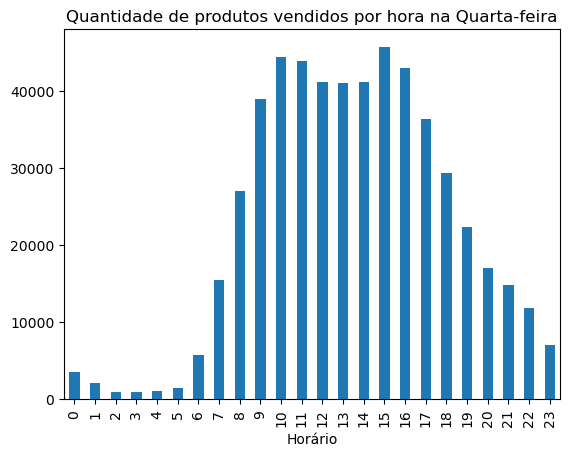

In [105]:
products_per_hour_3.plot(title='Quantidade de produtos vendidos por hora na Quarta-feira',
                        x='order_hour_of_day',
                        y='product_id',
                         xlabel='Horário',
                        kind='bar')

In [106]:
products_per_hour_6 = df_merge.query("order_dow == 6").groupby('order_hour_of_day')['product_id'].count()
products_per_hour_6.sort_values(ascending=True)

order_hour_of_day
3      1095
4      1272
5      1589
2      1693
1      2455
6      4366
0      4402
23     9060
22    13141
21    16625
7     16823
20    17937
19    24433
18    31644
8     33947
17    41482
9     44254
10    50099
16    50577
15    51626
12    51877
11    52086
13    54281
14    54571
Name: product_id, dtype: int64

<Axes: title={'center': 'Quantidade de produtos vendidos por hora no Sábado'}, xlabel='Horário'>

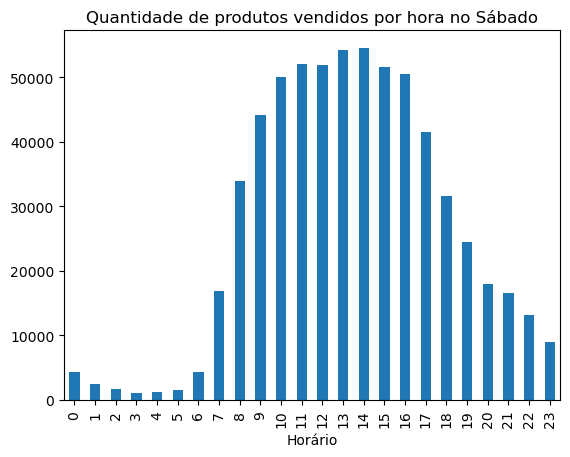

In [107]:
products_per_hour_6.plot(title='Quantidade de produtos vendidos por hora no Sábado',
                        x='order_hour_of_day',
                        y='product_id',
                         xlabel='Horário',
                        kind='bar')

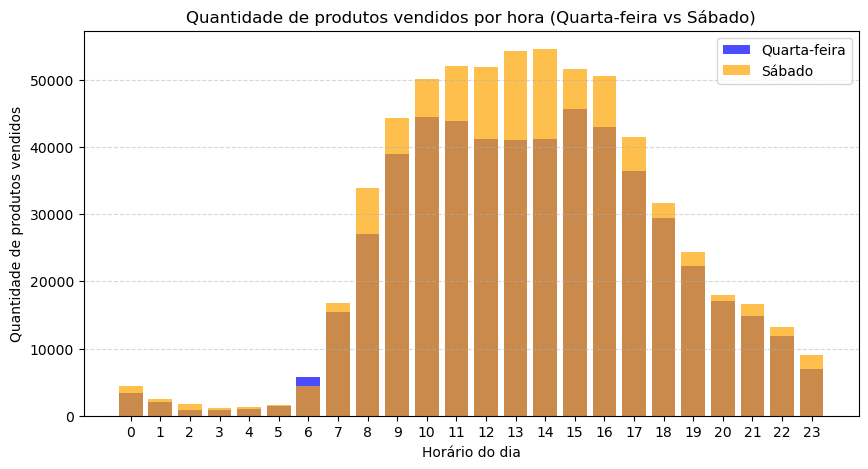

In [108]:
plt.figure(figsize=(10, 5))

plt.bar(products_per_hour_3.index, products_per_hour_3.values, 
        label='Quarta-feira', alpha=0.7, color='blue')

plt.bar(products_per_hour_6.index, products_per_hour_6.values, 
        label='Sábado', alpha=0.7, color='orange')

plt.title('Quantidade de produtos vendidos por hora (Quarta-feira vs Sábado)')
plt.xlabel('Horário do dia')
plt.ylabel('Quantidade de produtos vendidos')
plt.xticks(range(0, 24))  # Garantir que todas as horas apareçam no eixo X
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

Escreva suas conclusões aqui

Podemos observar que o único horário que houve mais vendas na quarta-feira que no sábado foi às 6h. 
Os horários com mais vendas no sábado foi entre 13h e 14h. Já na quarta feira foram às 10h e às 15h. 


### [B2] Qual é a distribuição do número de pedidos por cliente?

In [109]:
products_per_client = df_merge.groupby('user_id')['order_id'].count()
products_per_client.sort_values(ascending=True)

user_id
103176      1
149796      1
89493       1
149764      1
89523       1
         ... 
164055    504
23371     506
137629    526
33731     540
103634    580
Name: order_id, Length: 149626, dtype: int64

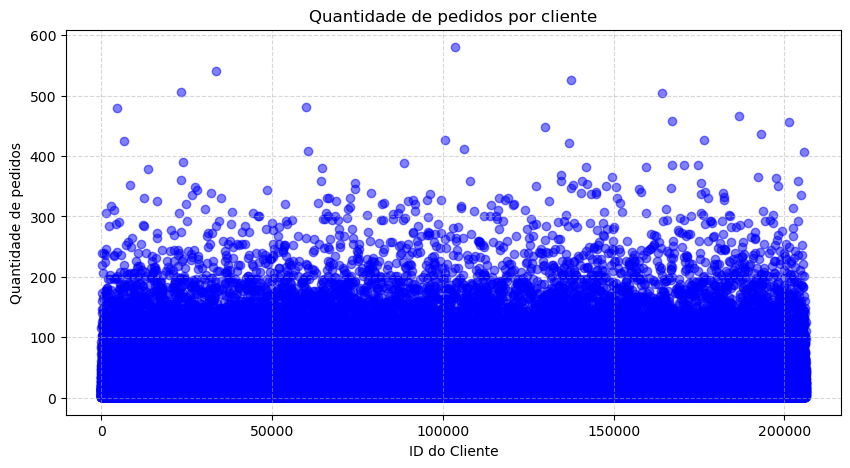

In [110]:
plt.figure(figsize=(10, 5))

# Criar o gráfico de dispersão
plt.scatter(products_per_client.index, products_per_client.values, alpha=0.5, color='blue')

# Adicionar título e rótulos
plt.title('Quantidade de pedidos por cliente')
plt.xlabel('ID do Cliente')
plt.ylabel('Quantidade de pedidos')
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

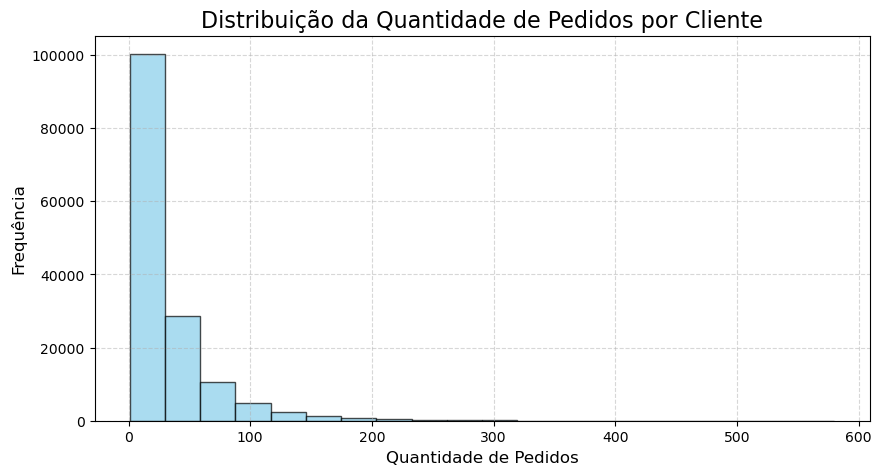

In [111]:
#Código gerado pela revisora 

import matplotlib.pyplot as plt

# Configura o tamanho da figura para o gráfico
plt.figure(figsize=(10, 5))

# Plota o histograma com melhorias
# 'bins=20' define o número de intervalos, 'color' altera a cor das barras,
# 'edgecolor' define a cor das bordas das barras e 'alpha' controla a transparência
products_per_client.plot(kind='hist', bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adiciona título ao gráfico
plt.title('Distribuição da Quantidade de Pedidos por Cliente', fontsize=16)

# Adiciona rótulos aos eixos X e Y
plt.xlabel('Quantidade de Pedidos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Adiciona linhas de grade no gráfico para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.5)

# Exibe o gráfico
plt.show()


Escreva suas conclusões aqui

A maioria dos clientes tem até 100 produtos. Poucos clientes tem até 200 produtos. Apenas um cliente comprou mais que 400 produtos. 

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [112]:
star_products = df_merge.groupby('product_id')['user_id'].count() #Agrupa os produtos de acordo com a quantidade de usuários
star_products.sort_values(ascending=False) #Ordem decrescente 

top_20_products = star_products.sort_values(ascending=False).head(20) #Separa os 20 mais vendidos
top_20_products = top_20_products.reset_index().merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
top_20_products

,product_id,user_id,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Escreva suas conclusões aqui

Nota-se que os 20 produtos mais vendidos são do setor alimentício, sendo os orgânicos mais procurados. 

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [113]:
products_per_order = df_merge.groupby('order_id')['product_id'].count().reset_index()

products_per_order

,order_id,product_id
0,4,13
1,9,15
2,11,5
3,19,3
4,20,8
...,...,...
450041,3421034,17
450042,3421053,9
450043,3421071,5
450044,3421077,4


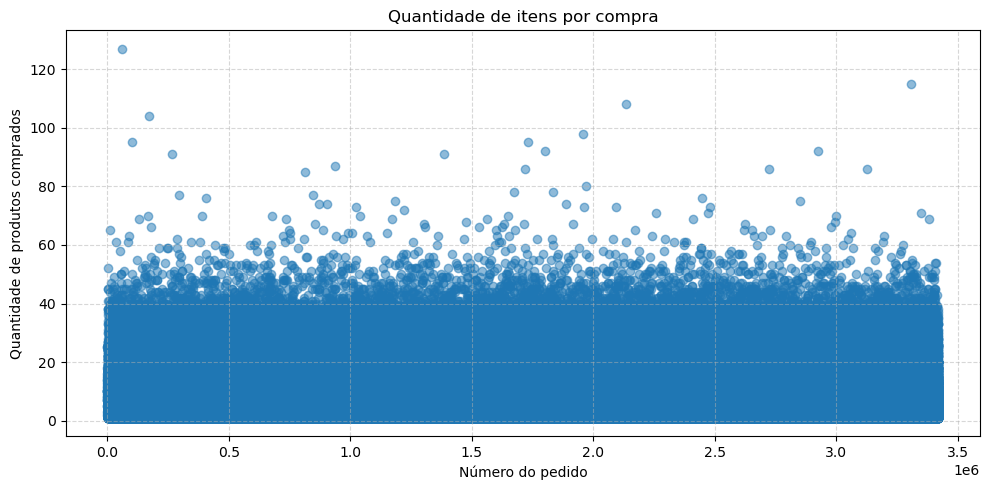

In [114]:
import matplotlib.pyplot as plt

# Agrupar e contar produtos por pedido
products_per_order = (
    df_merge
    .groupby('order_id')['product_id']
    .count()
    .reset_index(name='products_count')
)

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 5))
plt.scatter(
    products_per_order['order_id'],
    products_per_order['products_count'],
    alpha=0.5
)

# Títulos e rótulos
plt.title('Quantidade de itens por compra')
plt.xlabel('Número do pedido')
plt.ylabel('Quantidade de produtos comprados')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Escreva suas conclusões aqui

Normalmente as pessoas comprar até 40 itens por compra. POucas pessoas compram entre 50 e 60 itens na mesma compra. Apenas uma compra teve mais que 120 itens.

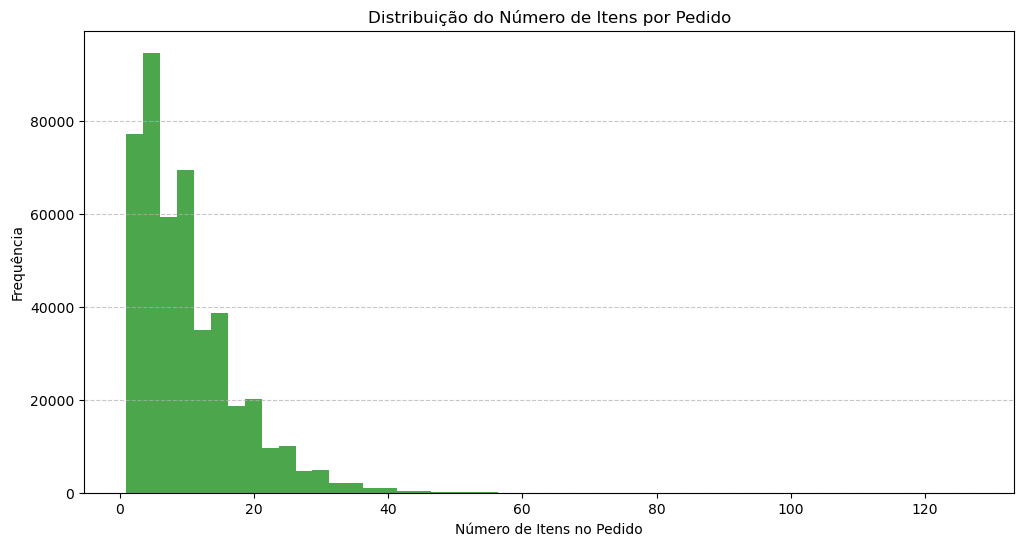

In [115]:
#Código gerado pela revisora 

import pandas as pd
import matplotlib.pyplot as plt

order_products = pd.read_csv('order_products.csv', sep=';')

items_per_order = order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=(12, 6))
plt.hist(items_per_order, bins=50, color='green', alpha=0.7)
plt.xlabel('Número de Itens no Pedido')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Itens por Pedido')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [116]:
#Adiciona a coluna 'add_to_cart_order' e 'product_name' no df_merge
df_merge2 = df_instacart_orders.merge(df_order[['product_id','order_id','add_to_cart_order']],on='order_id')
df_merge2 = df_merge2.merge(df_products[['product_id','department_id', 'product_name']],on='product_id') 
df_merge2


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,department_id,product_name
0,1515936,183418,11,6,13,30.0,19048,1,4,Organic Butternut Squash
1,1515936,183418,11,6,13,30.0,47766,3,4,Organic Avocado
2,1515936,183418,11,6,13,30.0,45066,9,4,Honeycrisp Apple
3,1515936,183418,11,6,13,30.0,24082,11,1,Organic Dark Sweet Cherries
4,1515936,183418,11,6,13,30.0,24363,4,7,Lemon Cayenne Agave Cold Pressed Juice Beverage
...,...,...,...,...,...,...,...,...,...,...
4545002,2071924,1730,18,1,14,15.0,1503,17,16,Low Fat Cottage Cheese
4545003,2071924,1730,18,1,14,15.0,4778,12,19,Wheat Thins Reduced Fat Crackers
4545004,2071924,1730,18,1,14,15.0,11512,1,16,Honey Yoghurt
4545005,2071924,1730,18,1,14,15.0,4920,6,4,Seedless Red Grapes


In [117]:
# Filtrar apenas os primeiros itens adicionados em cada pedido
first_product = df_merge2[df_merge2['add_to_cart_order'] == 1]

# Contar a frequência de cada produto
top_20_products = first_product['product_name'].value_counts().head(20)

top_20_products

product_name
Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Organic Yellow Onion            1246
Name: count, dtype: int64

Escreva suas conclusões aqui
Podemos ver que a banana é o primeio item a ser escolhido. Entre os 20 primeiros itens colocados no carrinho a grande maioria são alimentos de origem orgânica. 

# Conclusão geral do projeto:

Ao analisar os dados, é possível identificar aspectos importantes sobre o perfil predominante dos clientes na plataforma Instacart.

Observou-se que o intervalo de horário com maior volume de pedidos ocorre entre 9h e 17h, indicando que, de maneira geral, os clientes preferem realizar suas compras durante o dia.

Foram analisados dois dias específicos para identificar os horários de pico. Na quarta-feira, houve dois picos de pedidos, às 10h e às 15h. Já no sábado, o maior volume de pedidos ocorreu entre 13h e 14h.

Esses dados reforçam a tendência de que os clientes da plataforma preferem fazer suas compras durante o dia.

Além disso, verificou-se que a maioria dos clientes já realizou 200 pedidos, com uma média de 40 itens por pedido.

Os produtos alimentícios são os mais comprados, sendo a banana o item mais adquirido. Ela é frequentemente o primeiro produto a ser adicionado ao carrinho e está presente na compra de quase todos os clientes.

Os domingos são os dias com maior volume de compras de produtos alimentícios. Além disso podemos destacar a preferência por alimentos orgânicos.